In [ ]:
import _pickle as pickle

import numpy as np
import pandas as pd

import mxnet as mx
from mxnet import nd

"""
Load the model data
"""
with open('ecLogPrepare_grenoble-1month.pkl', 'rb') as f:
    [trainXDt,trainX2Dt, trainYDt,testXDt, testX2Dt,testYDt] = pickle.load(f)
# cpu or gpu
modelCtx = mx.gpu() if mx.context.num_gpus() else mx.cpu()
dataCtx = mx.gpu() if mx.context.num_gpus() else mx.cpu()

"""
The model training
"""
from MxnetModels.pointModels import TCN
from MxnetModels.pointTrainer import nnTrainer
# The models
inputSize=168
outputSize=24*7*4
dilations = [1,2,4,8,16,20,32]
nResidue = 11
actType='relu'
dropout=0.2
model1 = TCN(inputSize, outputSize, dilations,nResidue, actType, dropout)

mlpTrainer = nnTrainer(model1, dataCtx, modelCtx)

"""
define the trainer
"""
from mxnet.gluon.loss import L2Loss, L1Loss, HuberLoss

epochs = 200
esEpochs = 30
evalCriteria = 'min'

batchSize = 64
learningRate = 0.01
sampleRate = 0.8

initializer = mx.init.Xavier(magnitude=2.24)
initializer = mx.initializer.MSRAPrelu()
optimizer = 'adam';
lossFunc = HuberLoss() #Which is robust to outlier

paramsList = {'epochs': epochs, 'esEpochs': esEpochs, 'evalCriteria': evalCriteria,
        'batchSize': batchSize, 'learningRate': learningRate, 'sampleRate': sampleRate,
                    'initializer': initializer, 'optimizer':optimizer, 'lossFunc': lossFunc}

##The model traning
trainingMark='logTransform'
trainHistory = mlpTrainer.fit(trainingMark,trainXDt,trainX2Dt, trainYDt, testXDt, testX2Dt,testYDt, paramsList)


epochs:   0%|▎                                                                         | 1/200 [00:10<35:11, 10.61s/it]

Epoch 1 / 200. Training Loss: 0.06862224155536666.
Epoch 1 / 200. Testing loss: 0.097170815. Testing ND: 0.998603657760734. Test SMAPE: 199.80578291534135. Test NRMSE: 1.4335761619894742


epochs:   1%|▋                                                                         | 2/200 [00:20<34:07, 10.34s/it]

Epoch 2 / 200. Training Loss: 0.057788745451995735.
Epoch 2 / 200. Testing loss: 0.0900926. Testing ND: 0.9608823887501937. Test SMAPE: 194.1138015888848. Test NRMSE: 1.3838410356126203


epochs:   2%|█                                                                         | 3/200 [00:31<33:48, 10.30s/it]

Epoch 3 / 200. Training Loss: 0.04857299186542987.
Epoch 3 / 200. Testing loss: 0.06809784. Testing ND: 0.8338173634286565. Test SMAPE: 177.47540437699178. Test NRMSE: 1.2197620745873288


epochs:   2%|█▍                                                                        | 4/200 [00:41<33:43, 10.33s/it]

Epoch 4 / 200. Training Loss: 0.034377684358690604.
Epoch 4 / 200. Testing loss: 0.04580337. Testing ND: 0.6850522740100721. Test SMAPE: 160.81603626317454. Test NRMSE: 1.0095894420539218


epochs:   2%|█▊                                                                        | 5/200 [00:51<33:53, 10.43s/it]

Epoch 5 / 200. Training Loss: 0.027922918486865744.
Epoch 5 / 200. Testing loss: 0.029994333. Testing ND: 0.5632181872613538. Test SMAPE: 138.81316720668713. Test NRMSE: 0.8145297646663764


epochs:   3%|██▏                                                                       | 6/200 [01:02<33:38, 10.41s/it]

Epoch 6 / 200. Training Loss: 0.024518633249578682.
Epoch 6 / 200. Testing loss: 0.032212097. Testing ND: 0.6450462853595365. Test SMAPE: 125.96545857410774. Test NRMSE: 0.9419837309794801


epochs:   4%|██▌                                                                       | 7/200 [01:12<33:16, 10.34s/it]

Epoch 7 / 200. Training Loss: 0.02297307158177918.
Epoch 7 / 200. Testing loss: 0.024873557. Testing ND: 0.5035341453595101. Test SMAPE: 117.14915910721768. Test NRMSE: 0.7378007989092881


epochs:   4%|██▉                                                                       | 8/200 [01:22<32:46, 10.24s/it]

Epoch 8 / 200. Training Loss: 0.021993465411557826.
Epoch 8 / 200. Testing loss: 0.023830501. Testing ND: 0.4907842456576212. Test SMAPE: 110.7627854773162. Test NRMSE: 0.7253285608405377


epochs:   4%|███▎                                                                      | 9/200 [01:33<32:50, 10.32s/it]

Epoch 9 / 200. Training Loss: 0.021229525081446914.
Epoch 9 / 200. Testing loss: 0.023369715. Testing ND: 0.48281719541297446. Test SMAPE: 109.21358988384631. Test NRMSE: 0.7168558825736456


epochs:   5%|███▋                                                                     | 10/200 [01:43<32:37, 10.30s/it]

Epoch 10 / 200. Training Loss: 0.020927187022465325.
Epoch 10 / 200. Testing loss: 0.023072204. Testing ND: 0.4799466862286605. Test SMAPE: 106.84671687513708. Test NRMSE: 0.7129469263044103


epochs:   6%|████                                                                     | 11/200 [01:53<32:13, 10.23s/it]

Epoch 11 / 200. Training Loss: 0.020351668173848907.
Epoch 11 / 200. Testing loss: 0.022797333. Testing ND: 0.47501650987608324. Test SMAPE: 106.01578238566871. Test NRMSE: 0.709969728203538


epochs:   6%|████▍                                                                    | 12/200 [02:03<31:52, 10.17s/it]

Epoch 12 / 200. Training Loss: 0.020237410504460183.
Epoch 12 / 200. Testing loss: 0.022615496. Testing ND: 0.4698996172160632. Test SMAPE: 105.17894801365001. Test NRMSE: 0.7065434355870486


epochs:   6%|████▋                                                                    | 13/200 [02:13<31:28, 10.10s/it]

Epoch 13 / 200. Training Loss: 0.019700288622256035.
Epoch 13 / 200. Testing loss: 0.022590393. Testing ND: 0.4677381765567249. Test SMAPE: 104.06830324090973. Test NRMSE: 0.7072752019209646


epochs:   7%|█████                                                                    | 14/200 [02:23<31:14, 10.08s/it]

Epoch 14 / 200. Training Loss: 0.01945482527022103.
Epoch 14 / 200. Testing loss: 0.02224176. Testing ND: 0.4641629833321226. Test SMAPE: 102.92124534943552. Test NRMSE: 0.6993920759470633


epochs:   8%|█████▍                                                                   | 15/200 [02:33<31:03, 10.07s/it]

Epoch 15 / 200. Training Loss: 0.019062096654692332.
Epoch 15 / 200. Testing loss: 0.022500515. Testing ND: 0.4706786870594895. Test SMAPE: 102.83341945945259. Test NRMSE: 0.7061593862848187


epochs:   8%|█████▊                                                                   | 16/200 [02:43<30:40, 10.00s/it]

Epoch 16 / 200. Training Loss: 0.019210134598827002.
Epoch 16 / 200. Testing loss: 0.023243848. Testing ND: 0.47802511200451686. Test SMAPE: 101.03364194301906. Test NRMSE: 0.7256036128499491


epochs:   8%|██████▏                                                                  | 17/200 [02:53<30:31, 10.01s/it]

Epoch 17 / 200. Training Loss: 0.018752264796109096.
Epoch 17 / 200. Testing loss: 0.024234712. Testing ND: 0.49705552858896185. Test SMAPE: 103.09872932236233. Test NRMSE: 0.7487767239451367


epochs:   9%|██████▌                                                                  | 18/200 [03:03<30:28, 10.05s/it]

Epoch 18 / 200. Training Loss: 0.018441108406567184.
Epoch 18 / 200. Testing loss: 0.022594307. Testing ND: 0.4715035865338599. Test SMAPE: 99.97200780799643. Test NRMSE: 0.7052481905937591


epochs:  10%|██████▉                                                                  | 19/200 [03:13<30:08,  9.99s/it]

Epoch 19 / 200. Training Loss: 0.01808470074195429.
Epoch 19 / 200. Testing loss: 0.02380138. Testing ND: 0.488032822956597. Test SMAPE: 99.03054080302793. Test NRMSE: 0.7325825037121533


epochs:  10%|███████▎                                                                 | 20/200 [03:23<30:05, 10.03s/it]

Epoch 20 / 200. Training Loss: 0.018054593857119394.
Epoch 20 / 200. Testing loss: 0.022885414. Testing ND: 0.47140006412976276. Test SMAPE: 96.79999043434643. Test NRMSE: 0.7077949137704178


epochs:  10%|███████▋                                                                 | 21/200 [03:33<30:01, 10.06s/it]

Epoch 21 / 200. Training Loss: 0.017500016758450945.
Epoch 21 / 200. Testing loss: 0.022557208. Testing ND: 0.4663909302645718. Test SMAPE: 94.75675841843668. Test NRMSE: 0.7020514982044389


epochs:  11%|████████                                                                 | 22/200 [03:43<29:40, 10.00s/it]

Epoch 22 / 200. Training Loss: 0.017355020079306064.
Epoch 22 / 200. Testing loss: 0.022950215. Testing ND: 0.46657724938306183. Test SMAPE: 93.40145717641688. Test NRMSE: 0.7052015510462425


epochs:  12%|████████▍                                                                | 23/200 [03:53<29:21,  9.95s/it]

Epoch 23 / 200. Training Loss: 0.01705596546206769.
Epoch 23 / 200. Testing loss: 0.023337457. Testing ND: 0.46748957453651785. Test SMAPE: 94.13442576745759. Test NRMSE: 0.7083168154197891


epochs:  12%|████████▊                                                                | 24/200 [04:03<29:18,  9.99s/it]

Epoch 24 / 200. Training Loss: 0.01689926883461797.
Epoch 24 / 200. Testing loss: 0.02297249. Testing ND: 0.46732230897282706. Test SMAPE: 92.69428503790186. Test NRMSE: 0.7092058654240865


epochs:  12%|█████████▏                                                               | 25/200 [04:13<29:13, 10.02s/it]

Epoch 25 / 200. Training Loss: 0.01664468875298133.
Epoch 25 / 200. Testing loss: 0.022694195. Testing ND: 0.4600214465471693. Test SMAPE: 87.40689930115107. Test NRMSE: 0.7043705112931579


epochs:  13%|█████████▍                                                               | 26/200 [04:23<29:01, 10.01s/it]

Epoch 26 / 200. Training Loss: 0.01622761423320217.
Epoch 26 / 200. Testing loss: 0.02283798. Testing ND: 0.45400758690152615. Test SMAPE: 84.93224390409253. Test NRMSE: 0.7061258723764144


epochs:  14%|█████████▊                                                               | 27/200 [04:33<28:49, 10.00s/it]

Epoch 27 / 200. Training Loss: 0.015941990429035203.
Epoch 27 / 200. Testing loss: 0.022473728. Testing ND: 0.4501577627623717. Test SMAPE: 80.99385355488057. Test NRMSE: 0.6987284966619853


epochs:  14%|██████████▏                                                              | 28/200 [04:43<28:37,  9.99s/it]

Epoch 28 / 200. Training Loss: 0.016112952484910154.
Epoch 28 / 200. Testing loss: 0.022429872. Testing ND: 0.445751639996062. Test SMAPE: 77.54935876442529. Test NRMSE: 0.6996688744820193


epochs:  14%|██████████▌                                                              | 29/200 [04:53<28:30, 10.00s/it]

Epoch 29 / 200. Training Loss: 0.01587320967550386.
Epoch 29 / 200. Testing loss: 0.022125285. Testing ND: 0.4420325599716644. Test SMAPE: 74.07504254708172. Test NRMSE: 0.6921231851577009


epochs:  15%|██████████▉                                                              | 30/200 [05:03<28:25, 10.03s/it]

Epoch 30 / 200. Training Loss: 0.015727999381730414.
Epoch 30 / 200. Testing loss: 0.021651685. Testing ND: 0.4340592949047029. Test SMAPE: 71.89579518976012. Test NRMSE: 0.6846486945413695


epochs:  16%|███████████▎                                                             | 31/200 [05:13<28:18, 10.05s/it]

Epoch 31 / 200. Training Loss: 0.015332367651700072.
Epoch 31 / 200. Testing loss: 0.021577956. Testing ND: 0.4315037761601384. Test SMAPE: 71.27435859431453. Test NRMSE: 0.684672266368052


epochs:  16%|███████████▋                                                             | 32/200 [05:23<28:23, 10.14s/it]

Epoch 32 / 200. Training Loss: 0.015363611760085348.
Epoch 32 / 200. Testing loss: 0.021397447. Testing ND: 0.4337238960935501. Test SMAPE: 72.34185917881483. Test NRMSE: 0.6823713640601525


epochs:  16%|████████████                                                             | 33/200 [05:33<28:06, 10.10s/it]

Epoch 33 / 200. Training Loss: 0.015286150074846959.
Epoch 33 / 200. Testing loss: 0.021015387. Testing ND: 0.4256134490071761. Test SMAPE: 71.36054898972053. Test NRMSE: 0.6756672499506053


epochs:  17%|████████████▍                                                            | 34/200 [05:44<27:54, 10.09s/it]

Epoch 34 / 200. Training Loss: 0.015283204267484994.
Epoch 34 / 200. Testing loss: 0.02121376. Testing ND: 0.4257115069212542. Test SMAPE: 70.60296313318763. Test NRMSE: 0.6815408623584164


epochs:  18%|████████████▊                                                            | 35/200 [05:54<27:41, 10.07s/it]

Epoch 35 / 200. Training Loss: 0.015303356650497995.
Epoch 35 / 200. Testing loss: 0.021676306. Testing ND: 0.4357467284622946. Test SMAPE: 71.67510519242057. Test NRMSE: 0.6931433108237532


epochs:  18%|█████████████▏                                                           | 36/200 [06:04<27:31, 10.07s/it]

Epoch 36 / 200. Training Loss: 0.015066746354554069.
Epoch 36 / 200. Testing loss: 0.021232571. Testing ND: 0.42861032214880385. Test SMAPE: 72.20140500790657. Test NRMSE: 0.6810117747001032


epochs:  18%|█████████████▌                                                           | 37/200 [06:14<27:16, 10.04s/it]

Epoch 37 / 200. Training Loss: 0.014794882729856244.
Epoch 37 / 200. Testing loss: 0.02084213. Testing ND: 0.421103154533398. Test SMAPE: 70.9619120282628. Test NRMSE: 0.6723263825673331


epochs:  19%|█████████████▊                                                           | 38/200 [06:24<27:07, 10.05s/it]

Epoch 38 / 200. Training Loss: 0.014866705199358291.
Epoch 38 / 200. Testing loss: 0.020609701. Testing ND: 0.415319343627949. Test SMAPE: 70.36600442227827. Test NRMSE: 0.6659405783097304


epochs:  20%|██████████████▏                                                          | 39/200 [06:34<26:51, 10.01s/it]

Epoch 39 / 200. Training Loss: 0.014872599219313786.
Epoch 39 / 200. Testing loss: 0.020993987. Testing ND: 0.4262257780795001. Test SMAPE: 71.41153839926653. Test NRMSE: 0.6759901286865685


epochs:  20%|██████████████▌                                                          | 40/200 [06:44<26:48, 10.05s/it]

Epoch 40 / 200. Training Loss: 0.014908737673284427.
Epoch 40 / 200. Testing loss: 0.020650044. Testing ND: 0.41412041364027596. Test SMAPE: 69.57796492476054. Test NRMSE: 0.6711185055395834


epochs:  20%|██████████████▉                                                          | 41/200 [06:54<26:30, 10.01s/it]

Epoch 41 / 200. Training Loss: 0.014923835011177977.
Epoch 41 / 200. Testing loss: 0.020619469. Testing ND: 0.4203607056853307. Test SMAPE: 71.05457039428022. Test NRMSE: 0.6695996268697759


epochs:  21%|███████████████▎                                                         | 42/200 [07:04<26:26, 10.04s/it]

Epoch 42 / 200. Training Loss: 0.01495033615323965.
Epoch 42 / 200. Testing loss: 0.02032217. Testing ND: 0.41629184151401977. Test SMAPE: 70.28163554291098. Test NRMSE: 0.6651443211391675


epochs:  22%|███████████████▋                                                         | 43/200 [07:14<26:27, 10.11s/it]

Epoch 43 / 200. Training Loss: 0.014796882379250448.
Epoch 43 / 200. Testing loss: 0.020664351. Testing ND: 0.4204100502770304. Test SMAPE: 70.3087653145341. Test NRMSE: 0.6715736416828506


epochs:  22%|████████████████                                                         | 44/200 [07:24<26:11, 10.07s/it]

Epoch 44 / 200. Training Loss: 0.014914989922416466.
Epoch 44 / 200. Testing loss: 0.020642245. Testing ND: 0.4166084615557661. Test SMAPE: 69.58269937432993. Test NRMSE: 0.6708532047924881


epochs:  22%|████████████████▍                                                        | 45/200 [07:34<25:51, 10.01s/it]

Epoch 45 / 200. Training Loss: 0.014855654813903578.
Epoch 45 / 200. Testing loss: 0.020713542. Testing ND: 0.4207759036185456. Test SMAPE: 69.91741625539034. Test NRMSE: 0.67371526623409


epochs:  23%|████████████████▊                                                        | 46/200 [07:44<25:35,  9.97s/it]

Epoch 46 / 200. Training Loss: 0.014861602350261443.
Epoch 46 / 200. Testing loss: 0.020397598. Testing ND: 0.41569701102423323. Test SMAPE: 69.53177175189357. Test NRMSE: 0.6657716560503254


epochs:  24%|█████████████████▏                                                       | 47/200 [07:54<25:37, 10.05s/it]

Epoch 47 / 200. Training Loss: 0.014674024203085207.
Epoch 47 / 200. Testing loss: 0.020426197. Testing ND: 0.41260052264143154. Test SMAPE: 69.2771694235465. Test NRMSE: 0.6648332016656565


epochs:  24%|█████████████████▌                                                       | 48/200 [08:04<25:21, 10.01s/it]

Epoch 48 / 200. Training Loss: 0.014734446626593456.
Epoch 48 / 200. Testing loss: 0.02033067. Testing ND: 0.41402991175646175. Test SMAPE: 69.3249818207434. Test NRMSE: 0.6667284455742216


epochs:  24%|█████████████████▉                                                       | 49/200 [08:14<25:15, 10.04s/it]

Epoch 49 / 200. Training Loss: 0.014830020006187026.
Epoch 49 / 200. Testing loss: 0.019980228. Testing ND: 0.41018390521884657. Test SMAPE: 69.42741529572692. Test NRMSE: 0.6563390878899267


epochs:  25%|██████████████████▎                                                      | 50/200 [08:25<25:56, 10.38s/it]

Epoch 50 / 200. Training Loss: 0.014761075997563058.
Epoch 50 / 200. Testing loss: 0.02048621. Testing ND: 0.41441290624967225. Test SMAPE: 68.77795010416284. Test NRMSE: 0.6720864721320894


epochs:  26%|██████████████████▌                                                      | 51/200 [08:36<25:48, 10.39s/it]

Epoch 51 / 200. Training Loss: 0.014587322971108282.
Epoch 51 / 200. Testing loss: 0.020170288. Testing ND: 0.4113727308989737. Test SMAPE: 68.77809948110222. Test NRMSE: 0.6631561507560483


epochs:  26%|██████████████████▉                                                      | 52/200 [08:45<25:11, 10.21s/it]

Epoch 52 / 200. Training Loss: 0.014651434719186713.
Epoch 52 / 200. Testing loss: 0.020221362. Testing ND: 0.4108826163074344. Test SMAPE: 68.77940555965961. Test NRMSE: 0.6633780069221815


epochs:  26%|███████████████████▎                                                     | 53/200 [08:56<25:02, 10.22s/it]

Epoch 53 / 200. Training Loss: 0.014690314686163075.
Epoch 53 / 200. Testing loss: 0.0200182. Testing ND: 0.40570139715442083. Test SMAPE: 68.49542029715832. Test NRMSE: 0.6573976593129175


epochs:  27%|███████████████████▋                                                     | 54/200 [09:06<24:47, 10.19s/it]

Epoch 54 / 200. Training Loss: 0.014547256172680463.
Epoch 54 / 200. Testing loss: 0.019949775. Testing ND: 0.40542443595960237. Test SMAPE: 68.21983917496351. Test NRMSE: 0.6572890813150711


epochs:  28%|████████████████████                                                     | 55/200 [09:16<24:26, 10.12s/it]

Epoch 55 / 200. Training Loss: 0.014610246030559756.
Epoch 55 / 200. Testing loss: 0.019947382. Testing ND: 0.4067677095813805. Test SMAPE: 68.79333259196491. Test NRMSE: 0.6585063621238706


epochs:  28%|████████████████████▍                                                    | 56/200 [09:26<24:13, 10.10s/it]

Epoch 56 / 200. Training Loss: 0.014440406917172754.
Epoch 56 / 200. Testing loss: 0.019739226. Testing ND: 0.4003085891633704. Test SMAPE: 67.7684903529929. Test NRMSE: 0.6536266950809742


epochs:  28%|████████████████████▊                                                    | 57/200 [09:37<24:35, 10.32s/it]

Epoch 57 / 200. Training Loss: 0.01423246412529771.
Epoch 57 / 200. Testing loss: 0.019883247. Testing ND: 0.4085136274171663. Test SMAPE: 69.57417257489304. Test NRMSE: 0.6569497868859191


epochs:  29%|█████████████████████▏                                                   | 58/200 [09:47<24:17, 10.26s/it]

Epoch 58 / 200. Training Loss: 0.014397907527668629.
Epoch 58 / 200. Testing loss: 0.019731086. Testing ND: 0.40034164322978016. Test SMAPE: 67.4959194155329. Test NRMSE: 0.6520317549383577


epochs:  30%|█████████████████████▌                                                   | 59/200 [09:57<24:01, 10.23s/it]

Epoch 59 / 200. Training Loss: 0.014499946470368856.
Epoch 59 / 200. Testing loss: 0.01979733. Testing ND: 0.3992019363790326. Test SMAPE: 67.36545023223897. Test NRMSE: 0.6554383434765219


epochs:  30%|█████████████████████▉                                                   | 60/200 [10:07<23:43, 10.17s/it]

Epoch 60 / 200. Training Loss: 0.014482334613198741.
Epoch 60 / 200. Testing loss: 0.01992241. Testing ND: 0.402405398553259. Test SMAPE: 67.97437149221759. Test NRMSE: 0.6580982417854907


epochs:  30%|██████████████████████▎                                                  | 61/200 [10:17<23:30, 10.15s/it]

Epoch 61 / 200. Training Loss: 0.014275532803048403.
Epoch 61 / 200. Testing loss: 0.019736808. Testing ND: 0.40050321766941477. Test SMAPE: 67.38799093423691. Test NRMSE: 0.653436865252673


epochs:  31%|██████████████████████▋                                                  | 62/200 [10:27<23:13, 10.10s/it]

Epoch 62 / 200. Training Loss: 0.014349651066081371.
Epoch 62 / 200. Testing loss: 0.020160126. Testing ND: 0.41382146637884415. Test SMAPE: 69.70739142402492. Test NRMSE: 0.6618589993438752


epochs:  32%|██████████████████████▉                                                  | 63/200 [10:37<22:49, 10.00s/it]

Epoch 63 / 200. Training Loss: 0.014249341184224036.
Epoch 63 / 200. Testing loss: 0.01978582. Testing ND: 0.4015481035197665. Test SMAPE: 67.34229390821424. Test NRMSE: 0.6540968729674974


epochs:  32%|███████████████████████▎                                                 | 64/200 [10:47<22:34,  9.96s/it]

Epoch 64 / 200. Training Loss: 0.014389116706944354.
Epoch 64 / 200. Testing loss: 0.019743754. Testing ND: 0.4009722554776153. Test SMAPE: 68.11365805803766. Test NRMSE: 0.6539208406476948


epochs:  32%|███████████████████████▋                                                 | 65/200 [10:57<22:35, 10.04s/it]

Epoch 65 / 200. Training Loss: 0.014322635505118256.
Epoch 65 / 200. Testing loss: 0.019880647. Testing ND: 0.3987322182042929. Test SMAPE: 67.29404704794106. Test NRMSE: 0.655164358408684


epochs:  33%|████████████████████████                                                 | 66/200 [11:07<22:30, 10.07s/it]

Epoch 66 / 200. Training Loss: 0.014163709228005717.
Epoch 66 / 200. Testing loss: 0.019530037. Testing ND: 0.3974089021110478. Test SMAPE: 66.98061910224796. Test NRMSE: 0.6508838270826467


epochs:  34%|████████████████████████▍                                                | 67/200 [11:17<22:08,  9.99s/it]

Epoch 67 / 200. Training Loss: 0.014148157151018987.
Epoch 67 / 200. Testing loss: 0.019633314. Testing ND: 0.3973507790053277. Test SMAPE: 67.04457558245845. Test NRMSE: 0.6536089063130088


epochs:  34%|████████████████████████▊                                                | 68/200 [11:27<22:24, 10.19s/it]

Epoch 68 / 200. Training Loss: 0.014536243669622934.
Epoch 68 / 200. Testing loss: 0.019951021. Testing ND: 0.4095311232738584. Test SMAPE: 68.65684248052996. Test NRMSE: 0.6616331620869046


epochs:  34%|█████████████████████████▏                                               | 69/200 [11:37<21:49, 10.00s/it]

Epoch 69 / 200. Training Loss: 0.014493923620197541.
Epoch 69 / 200. Testing loss: 0.019830244. Testing ND: 0.3970938337961002. Test SMAPE: 67.05218731859306. Test NRMSE: 0.6560556108989989


epochs:  35%|█████████████████████████▌                                               | 70/200 [11:47<21:45, 10.04s/it]

Epoch 70 / 200. Training Loss: 0.01444519648485797.
Epoch 70 / 200. Testing loss: 0.019451724. Testing ND: 0.40080027519843. Test SMAPE: 69.0961428864952. Test NRMSE: 0.6458684406801731


epochs:  36%|█████████████████████████▉                                               | 71/200 [11:56<21:07,  9.82s/it]

Epoch 71 / 200. Training Loss: 0.014227722361589892.
Epoch 71 / 200. Testing loss: 0.019795181. Testing ND: 0.39660741956718865. Test SMAPE: 67.12506202138448. Test NRMSE: 0.6536167895195346


epochs:  36%|██████████████████████████▎                                              | 72/200 [12:05<20:19,  9.53s/it]

Epoch 72 / 200. Training Loss: 0.014291971358194627.
Epoch 72 / 200. Testing loss: 0.019639185. Testing ND: 0.39701862118778136. Test SMAPE: 67.8261845255133. Test NRMSE: 0.6522494719732483


epochs:  36%|██████████████████████████▋                                              | 73/200 [12:14<19:49,  9.37s/it]

Epoch 73 / 200. Training Loss: 0.014168969319116273.
Epoch 73 / 200. Testing loss: 0.020067709. Testing ND: 0.40486010937496986. Test SMAPE: 67.47331016487011. Test NRMSE: 0.6645260771372671


epochs:  37%|███████████████████████████                                              | 74/200 [12:23<19:21,  9.22s/it]

Epoch 74 / 200. Training Loss: 0.014039120938708773.
Epoch 74 / 200. Testing loss: 0.019634107. Testing ND: 0.39973155849632136. Test SMAPE: 67.72939084301281. Test NRMSE: 0.6513829819860565


epochs:  38%|███████████████████████████▍                                             | 75/200 [12:33<19:43,  9.47s/it]

Epoch 75 / 200. Training Loss: 0.014053109013868912.
Epoch 75 / 200. Testing loss: 0.020561185. Testing ND: 0.4170808058014121. Test SMAPE: 68.12719314691365. Test NRMSE: 0.6779940893246542


epochs:  38%|███████████████████████████▋                                             | 76/200 [12:43<19:38,  9.50s/it]

Epoch 76 / 200. Training Loss: 0.014307720814496843.
Epoch 76 / 200. Testing loss: 0.01970996. Testing ND: 0.4006947794949716. Test SMAPE: 67.94156029552867. Test NRMSE: 0.6521579696394336


epochs:  38%|████████████████████████████                                             | 77/200 [12:52<19:21,  9.45s/it]

Epoch 77 / 200. Training Loss: 0.014224719730632152.
Epoch 77 / 200. Testing loss: 0.019451559. Testing ND: 0.39537149113228226. Test SMAPE: 67.69278933072184. Test NRMSE: 0.6473064707305218


epochs:  39%|████████████████████████████▍                                            | 78/200 [13:01<18:59,  9.34s/it]

Epoch 78 / 200. Training Loss: 0.01409408288525152.
Epoch 78 / 200. Testing loss: 0.019620169. Testing ND: 0.3982193254627177. Test SMAPE: 67.47290168531973. Test NRMSE: 0.6526045687601465


epochs:  40%|████████████████████████████▊                                            | 79/200 [13:10<18:46,  9.31s/it]

Epoch 79 / 200. Training Loss: 0.014136492379225818.
Epoch 79 / 200. Testing loss: 0.019818323. Testing ND: 0.40289985870814427. Test SMAPE: 68.32851313358553. Test NRMSE: 0.6591941229160314


epochs:  40%|█████████████████████████████▏                                           | 80/200 [13:21<19:09,  9.58s/it]

Epoch 80 / 200. Training Loss: 0.014281888176483886.
Epoch 80 / 200. Testing loss: 0.020383967. Testing ND: 0.4089649572351862. Test SMAPE: 68.04567469363388. Test NRMSE: 0.6707599957935466


epochs:  40%|█████████████████████████████▌                                           | 81/200 [13:34<21:18, 10.74s/it]

Epoch 81 / 200. Training Loss: 0.014248138117459503.
Epoch 81 / 200. Testing loss: 0.01977296. Testing ND: 0.39938344814057664. Test SMAPE: 67.19579282688866. Test NRMSE: 0.6566520788736967


epochs:  41%|█████████████████████████████▉                                           | 82/200 [13:45<21:17, 10.83s/it]

Epoch 82 / 200. Training Loss: 0.014183600342739727.
Epoch 82 / 200. Testing loss: 0.0196441. Testing ND: 0.39908626448737605. Test SMAPE: 67.78321151866608. Test NRMSE: 0.6518124110144138


epochs:  42%|██████████████████████████████▎                                          | 83/200 [13:57<21:52, 11.22s/it]

Epoch 83 / 200. Training Loss: 0.014088964853130404.
Epoch 83 / 200. Testing loss: 0.020059178. Testing ND: 0.4019973633448278. Test SMAPE: 67.75821827577245. Test NRMSE: 0.6622107178973383


epochs:  42%|██████████████████████████████▋                                          | 84/200 [14:07<20:46, 10.74s/it]

Epoch 84 / 200. Training Loss: 0.014101572776351871.
Epoch 84 / 200. Testing loss: 0.019750688. Testing ND: 0.404095573061204. Test SMAPE: 68.29409306508416. Test NRMSE: 0.6559287738881968


epochs:  42%|███████████████████████████████                                          | 85/200 [14:16<19:30, 10.17s/it]

Epoch 85 / 200. Training Loss: 0.01426982218199991.
Epoch 85 / 200. Testing loss: 0.019845044. Testing ND: 0.3970490683351832. Test SMAPE: 67.41933032696069. Test NRMSE: 0.6576068295508608


epochs:  43%|███████████████████████████████▍                                         | 86/200 [14:25<18:37,  9.80s/it]

Epoch 86 / 200. Training Loss: 0.014087970891185245.
Epoch 86 / 200. Testing loss: 0.019557388. Testing ND: 0.4015521706031972. Test SMAPE: 68.0872965399814. Test NRMSE: 0.6522231352549711


epochs:  44%|███████████████████████████████▊                                         | 87/200 [14:34<17:55,  9.52s/it]

Epoch 87 / 200. Training Loss: 0.01395694319567494.
Epoch 87 / 200. Testing loss: 0.019523112. Testing ND: 0.3962760208394697. Test SMAPE: 67.23180325129249. Test NRMSE: 0.6506578229239439


epochs:  44%|████████████████████████████████                                         | 88/200 [14:43<17:28,  9.36s/it]

Epoch 88 / 200. Training Loss: 0.013790273576185652.
Epoch 88 / 200. Testing loss: 0.019421281. Testing ND: 0.3983993517837723. Test SMAPE: 68.32383621997552. Test NRMSE: 0.6482237227012254


epochs:  44%|████████████████████████████████▍                                        | 89/200 [14:51<17:02,  9.21s/it]

Epoch 89 / 200. Training Loss: 0.0140405391233716.
Epoch 89 / 200. Testing loss: 0.019763263. Testing ND: 0.3980957853363562. Test SMAPE: 67.33442247337945. Test NRMSE: 0.6551019579024038


epochs:  45%|████████████████████████████████▊                                        | 90/200 [15:00<16:48,  9.17s/it]

Epoch 90 / 200. Training Loss: 0.013960119604613411.
Epoch 90 / 200. Testing loss: 0.01974697. Testing ND: 0.4025459756874459. Test SMAPE: 68.14426614133691. Test NRMSE: 0.6556234577512906


epochs:  46%|█████████████████████████████████▏                                       | 91/200 [15:10<16:36,  9.14s/it]

Epoch 91 / 200. Training Loss: 0.013899401487949367.
Epoch 91 / 200. Testing loss: 0.019609524. Testing ND: 0.3996215023836453. Test SMAPE: 68.0191676963854. Test NRMSE: 0.6515411651253187


epochs:  46%|█████████████████████████████████▌                                       | 92/200 [15:19<16:22,  9.10s/it]

Epoch 92 / 200. Training Loss: 0.013961777109817178.
Epoch 92 / 200. Testing loss: 0.019606922. Testing ND: 0.3986044361414782. Test SMAPE: 68.03891348575685. Test NRMSE: 0.6516795463478253


epochs:  46%|█████████████████████████████████▉                                       | 93/200 [15:27<16:04,  9.02s/it]

Epoch 93 / 200. Training Loss: 0.013950851345423041.
Epoch 93 / 200. Testing loss: 0.01961905. Testing ND: 0.3992380992161847. Test SMAPE: 67.8522059177891. Test NRMSE: 0.6510567195743348


epochs:  47%|██████████████████████████████████▎                                      | 94/200 [15:36<15:50,  8.97s/it]

Epoch 94 / 200. Training Loss: 0.014002318490498605.
Epoch 94 / 200. Testing loss: 0.019878829. Testing ND: 0.3977167935876186. Test SMAPE: 67.47456581391252. Test NRMSE: 0.656622123865866


epochs:  48%|██████████████████████████████████▋                                      | 95/200 [15:45<15:44,  9.00s/it]

Epoch 95 / 200. Training Loss: 0.014056277154823871.
Epoch 95 / 200. Testing loss: 0.019639805. Testing ND: 0.39807691717885996. Test SMAPE: 67.43670727158516. Test NRMSE: 0.6516828235623872


epochs:  48%|███████████████████████████████████                                      | 96/200 [15:54<15:29,  8.94s/it]

Epoch 96 / 200. Training Loss: 0.014082234413897405.
Epoch 96 / 200. Testing loss: 0.019540634. Testing ND: 0.3964451591257746. Test SMAPE: 67.79066034124845. Test NRMSE: 0.6494155529948248


epochs:  48%|███████████████████████████████████▍                                     | 97/200 [16:03<15:28,  9.02s/it]

Epoch 97 / 200. Training Loss: 0.01384473192736901.
Epoch 97 / 200. Testing loss: 0.019583656. Testing ND: 0.3971363289872152. Test SMAPE: 67.40215313185199. Test NRMSE: 0.6510318928566744


epochs:  49%|███████████████████████████████████▊                                     | 98/200 [16:12<15:20,  9.03s/it]

Epoch 98 / 200. Training Loss: 0.013844609410886055.
Epoch 98 / 200. Testing loss: 0.020017073. Testing ND: 0.40426704194460633. Test SMAPE: 68.41751403681418. Test NRMSE: 0.6592191239518201


epochs:  50%|████████████████████████████████████▏                                    | 99/200 [16:22<15:20,  9.11s/it]

Epoch 99 / 200. Training Loss: 0.014005768945508767.
Epoch 99 / 200. Testing loss: 0.019569864. Testing ND: 0.39743191780290293. Test SMAPE: 67.70479019439125. Test NRMSE: 0.6509976825976939


epochs:  50%|████████████████████████████████████                                    | 100/200 [16:30<14:57,  8.98s/it]

Epoch 100 / 200. Training Loss: 0.013860411782282749.
Epoch 100 / 200. Testing loss: 0.01957694. Testing ND: 0.3939183111553705. Test SMAPE: 67.23065869731118. Test NRMSE: 0.6490977811976194


epochs:  50%|████████████████████████████████████▎                                   | 101/200 [16:39<14:47,  8.96s/it]

Epoch 101 / 200. Training Loss: 0.01386371702143704.
Epoch 101 / 200. Testing loss: 0.020214677. Testing ND: 0.42205247819673963. Test SMAPE: 70.00593845389055. Test NRMSE: 0.6735787595935794


epochs:  51%|████████████████████████████████████▋                                   | 102/200 [16:48<14:39,  8.97s/it]

Epoch 102 / 200. Training Loss: 0.014030322902289796.
Epoch 102 / 200. Testing loss: 0.019739209. Testing ND: 0.397306131119062. Test SMAPE: 67.40624269346598. Test NRMSE: 0.6530002869157269


epochs:  52%|█████████████████████████████████████                                   | 103/200 [16:57<14:22,  8.89s/it]

Epoch 103 / 200. Training Loss: 0.014120175288273739.
Epoch 103 / 200. Testing loss: 0.020145457. Testing ND: 0.4184436743560387. Test SMAPE: 68.46030046570326. Test NRMSE: 0.6748960475382114


epochs:  52%|█████████████████████████████████████▍                                  | 104/200 [17:06<14:14,  8.90s/it]

Epoch 104 / 200. Training Loss: 0.014028448174610113.
Epoch 104 / 200. Testing loss: 0.019683743. Testing ND: 0.40039309309807675. Test SMAPE: 67.56779751925754. Test NRMSE: 0.6539003490260641


epochs:  52%|█████████████████████████████████████▊                                  | 105/200 [17:15<14:00,  8.84s/it]

Epoch 105 / 200. Training Loss: 0.013977035297571785.
Epoch 105 / 200. Testing loss: 0.019451614. Testing ND: 0.399448375615197. Test SMAPE: 68.26739489026833. Test NRMSE: 0.6506551055058398


epochs:  53%|██████████████████████████████████████▏                                 | 106/200 [17:23<13:51,  8.84s/it]

Epoch 106 / 200. Training Loss: 0.013889540188850701.
Epoch 106 / 200. Testing loss: 0.019802004. Testing ND: 0.4018190434411594. Test SMAPE: 68.05870684564204. Test NRMSE: 0.6554691219826166


epochs:  54%|██████████████████████████████████████▌                                 | 107/200 [17:32<13:47,  8.89s/it]

Epoch 107 / 200. Training Loss: 0.013682223659144975.
Epoch 107 / 200. Testing loss: 0.019964468. Testing ND: 0.4020981953965599. Test SMAPE: 67.47547226007194. Test NRMSE: 0.6602547281785882


epochs:  54%|██████████████████████████████████████▉                                 | 108/200 [17:42<13:56,  9.10s/it]

Epoch 108 / 200. Training Loss: 0.013814931559231964.
Epoch 108 / 200. Testing loss: 0.019870197. Testing ND: 0.4042902184387468. Test SMAPE: 68.92679223806302. Test NRMSE: 0.6559488677056355


epochs:  55%|███████████████████████████████████████▏                                | 109/200 [17:52<14:00,  9.23s/it]

Epoch 109 / 200. Training Loss: 0.013884127215208653.
Epoch 109 / 200. Testing loss: 0.019773671. Testing ND: 0.4049279246235201. Test SMAPE: 68.39640144174707. Test NRMSE: 0.6558171372211965


epochs:  55%|███████████████████████████████████████▌                                | 110/200 [18:01<13:48,  9.21s/it]

Epoch 110 / 200. Training Loss: 0.013761935137860561.
Epoch 110 / 200. Testing loss: 0.020086493. Testing ND: 0.4038533243323565. Test SMAPE: 68.21293859108906. Test NRMSE: 0.6625144197081395


epochs:  56%|███████████████████████████████████████▉                                | 111/200 [18:10<13:41,  9.23s/it]

Epoch 111 / 200. Training Loss: 0.013799506809191325.
Epoch 111 / 200. Testing loss: 0.019479856. Testing ND: 0.39424655053242097. Test SMAPE: 67.51797415531045. Test NRMSE: 0.6494601731282522


epochs:  56%|████████████████████████████████████████▎                               | 112/200 [18:21<14:15,  9.72s/it]

Epoch 112 / 200. Training Loss: 0.013834036463897435.
Epoch 112 / 200. Testing loss: 0.020010227. Testing ND: 0.40522709203694857. Test SMAPE: 68.33430011105665. Test NRMSE: 0.6616910197829075


epochs:  56%|████████████████████████████████████████▋                               | 113/200 [18:30<13:59,  9.65s/it]

Epoch 113 / 200. Training Loss: 0.013972721214102014.
Epoch 113 / 200. Testing loss: 0.020108659. Testing ND: 0.40499143438307345. Test SMAPE: 68.60882652707859. Test NRMSE: 0.6615701029500022


epochs:  57%|█████████████████████████████████████████                               | 114/200 [18:40<14:00,  9.77s/it]

Epoch 114 / 200. Training Loss: 0.013811907581844066.
Epoch 114 / 200. Testing loss: 0.020803016. Testing ND: 0.43865702299759846. Test SMAPE: 69.96577869048727. Test NRMSE: 0.694841640618952


epochs:  57%|█████████████████████████████████████████▍                              | 115/200 [18:50<13:36,  9.60s/it]

Epoch 115 / 200. Training Loss: 0.013970487505610925.
Epoch 115 / 200. Testing loss: 0.019702187. Testing ND: 0.39869036111502365. Test SMAPE: 67.60232610964297. Test NRMSE: 0.6533878773843073


epochs:  58%|█████████████████████████████████████████▊                              | 116/200 [18:59<13:20,  9.53s/it]

Epoch 116 / 200. Training Loss: 0.013675706082905676.
Epoch 116 / 200. Testing loss: 0.019878225. Testing ND: 0.41193009616367915. Test SMAPE: 69.86989018751501. Test NRMSE: 0.6576481366247834


epochs:  58%|██████████████████████████████████████████                              | 117/200 [19:08<13:10,  9.52s/it]

Epoch 117 / 200. Training Loss: 0.013780122597010109.
Epoch 117 / 200. Testing loss: 0.019867074. Testing ND: 0.3980727332374862. Test SMAPE: 67.49764744766289. Test NRMSE: 0.6577323719495034


epochs:  58%|██████████████████████████████████████████                              | 117/200 [19:18<13:41,  9.90s/it]

Epoch 118 / 200. Training Loss: 0.01393419616910879.
Epoch 118 / 200. Testing loss: 0.020064324. Testing ND: 0.41332833367227273. Test SMAPE: 68.48288509481404. Test NRMSE: 0.6662603087778037


In [ ]:
predResult = mlpTrainer.predict(mlpTrainer.model, testXDt, testX2Dt)

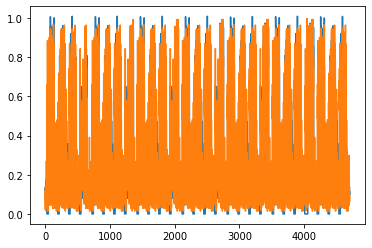

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predResult.squeeze().asnumpy().reshape(-1,1))
plt.plot(testYDt.reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

true_values= testYDt.reshape(-1,1)
p50_list=predResult.squeeze().asnumpy().reshape(-1,1)
print(f"MAE: {mean_absolute_error(true_values, p50_list)}, RMSE: {mean_squared_error(true_values, p50_list) ** 0.5}, MAPE: {mean_absolute_percentage_error(true_values, p50_list)}")
print( "The accuracy of the model is: %f" %r2_score(true_values, p50_list))

MAE: 0.12587478656367695, RMSE: 0.20032136384376475, MAPE: 0.7314478571201454
The accuracy of the model is: 0.540533
